<a href="https://colab.research.google.com/github/julian-masdatascience/ML/blob/master/ML_No_Supervisado.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML - No Supervisado

Las librerias más utilizadas son scikit-learn, TensorFlow y keras

### Lets Go!!

In [1]:
## Se importan las librerias
from sklearn import datasets 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
## cargamos un dataset de la libreria sklearn
ds = datasets.load_iris()
ds.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

## Ahora visualicemos datos y miremos como se agrupan


    sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
61                5.9               3.0                4.2               1.5


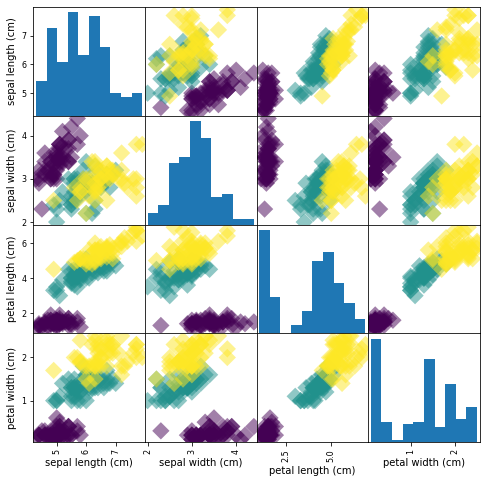

In [3]:
X = ds.data  
y = ds.target
df = pd.DataFrame(X, columns=ds.feature_names) 
print(df.sample())
pd.plotting.scatter_matrix(df, c = y, figsize = [8, 8],s=150, marker = 'D');

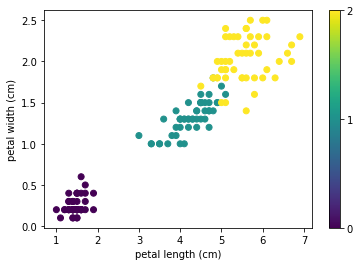

In [8]:
# Si graficamos solo la información de sepalos y miramos como se agrupan asi misma por colores
x_index = 2 
y_index = 3
plt.scatter(ds.data[:, x_index], ds.data[:, y_index], c=ds.target)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.show()

## 1. K-Means: Intuición

#### Fit / Predict

In [9]:
from sklearn.cluster import KMeans 
# se crea el modelo 
kmeans  = KMeans(n_clusters=3,init = 'k-means++', random_state = 42) 
# se ajusta el modelo a los datos 
kmeans.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [0]:
y_kmeans = kmeans.fit_predict(X)

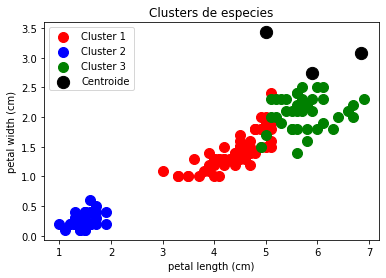

In [11]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, x_index], X[y_kmeans == 0, y_index], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, x_index], X[y_kmeans == 1, y_index], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, x_index], X[y_kmeans == 2, y_index], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroide')
plt.title('Clusters de especies')
plt.xlabel(ds.feature_names[x_index])
plt.ylabel(ds.feature_names[y_index])
plt.legend(loc='best'	)
plt.show()

### Miremos un poco más de K-means
Metodo del codo


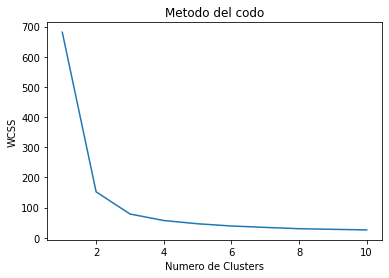

In [12]:
resultados = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    resultados.append(kmeans.inertia_)
plt.plot(range(1, 11), resultados)
plt.title('Metodo del codo')
plt.xlabel('Numero de Clusters')
plt.ylabel('WCSS')
plt.show()

**Ejercico**: Ahora vamos nosotros

In [0]:
# cargar el archivo que esta en la siguiente ruta en un dataframe
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/clientes_centro_comercial.txt')
# obtener los datos que se van a agrupar (no incluir la variable objetivo)
X = dataset.iloc[:, [3, 4]].values

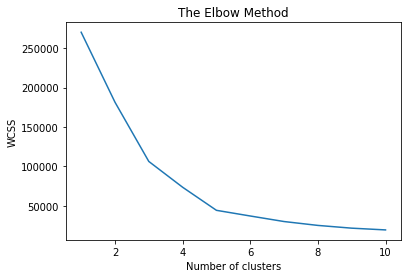

In [14]:
# Aplicar el metodo del codo para encontrar el mejor K
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

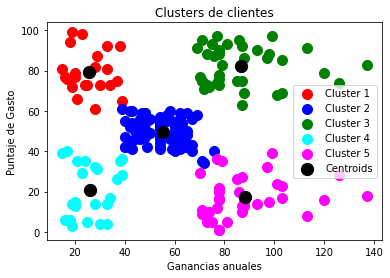

In [15]:
# ajustar el modelo con el K encontrado y pintarlo
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

# graficar los cluster
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.title('Clusters de clientes')
plt.xlabel('Ganancias anuales')
plt.ylabel('Puntaje de Gasto')
plt.legend()
plt.show()

**Ejercicio 2** : Ahora vamos a mirar otro ejemplo que describe el tiempo de espera entre erupciones y su duración del géiser Old Faithful en el Parque Nacional de Yellowstone. Se va a encontrar los K subgrupos:


In [33]:
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline
plt.style.use('fivethirtyeight')
from warnings import filterwarnings
filterwarnings('ignore')

# Import the data
df = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/eruciones.txt')
df.sample(2)

,erupciones,tiempo_espera
264,1.983,43
137,4.933,86


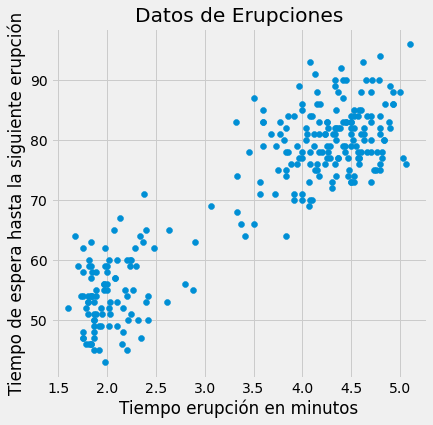

In [34]:
# Plot the data
plt.figure(figsize=(6, 6))
plt.scatter(df.iloc[:, 0], df.iloc[:, 1])
plt.xlabel('Tiempo erupción en minutos')
plt.ylabel('Tiempo de espera hasta la siguiente erupción')
plt.title('Datos de Erupciones');

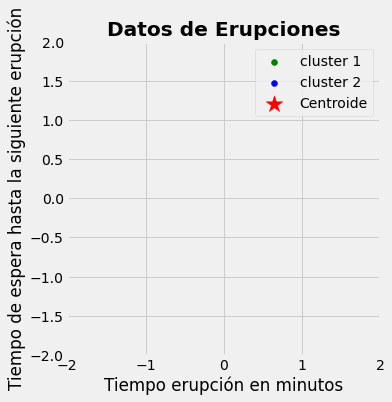

In [41]:

X = df.values
# creo el modelo 
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X)
centroids = km.cluster_centers_
y_kmeans = km.fit_predict(X)
# grafico el modelo 
fig, ax = plt.subplots(figsize=(5, 10))

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],  c='green', label='cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],  c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,   c='r', label='Centroide')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Tiempo erupción en minutos')
plt.ylabel('Tiempo de espera hasta la siguiente erupción')
plt.title('Datos de Erupciones', fontweight='bold');
ax.set_aspect('equal');

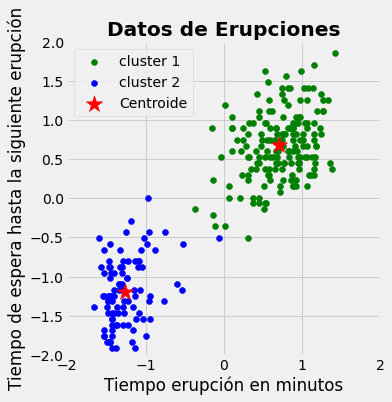

In [43]:
# Estandarizo la data
X_std = StandardScaler().fit_transform(df)

# creo el modelo 
km = KMeans(n_clusters=2, max_iter=100)
km.fit(X_std)
centroids = km.cluster_centers_
y_kmeans = km.fit_predict(X_std)
# grafico el modelo
fig, ax = plt.subplots(figsize=(5, 10))

plt.scatter(X_std[y_kmeans == 0, 0], X_std[y_kmeans == 0, 1],  c='green', label='cluster 1')
plt.scatter(X_std[y_kmeans == 1, 0], X_std[y_kmeans == 1, 1],  c='blue', label='cluster 2')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='*', s=300,   c='r', label='Centroide')
plt.legend()
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('Tiempo erupción en minutos')
plt.ylabel('Tiempo de espera hasta la siguiente erupción')
plt.title('Datos de Erupciones', fontweight='bold');
ax.set_aspect('equal');

## Dendograma

In [0]:
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/clientes_centro_comercial.txt')
X = dataset.iloc[:, [3, 4]].values

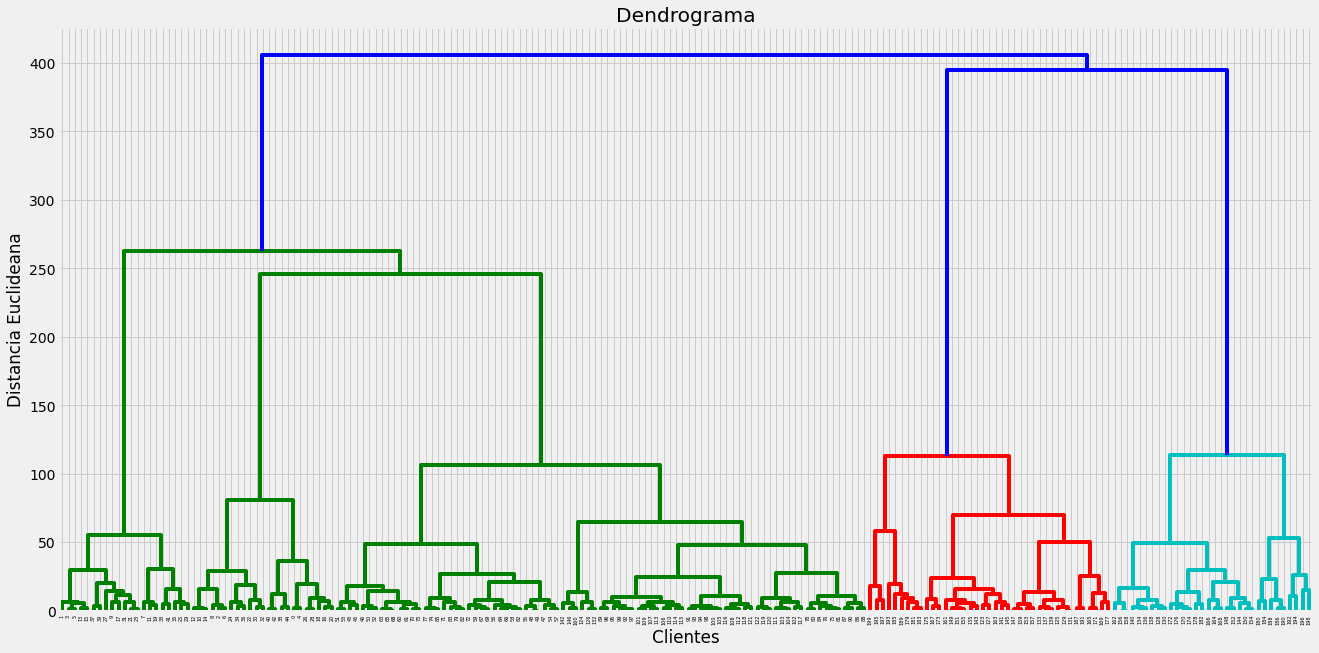

In [63]:
import scipy.cluster.hierarchy as sch
from matplotlib.pyplot import figure
plt.figure(figsize=(20,10))
dendrograma = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclideana')
plt.show()

In [0]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X)

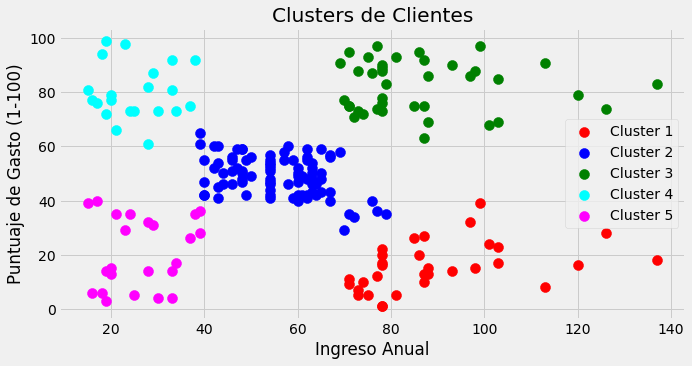

In [62]:
plt.figure(figsize=(10,5))
plt.scatter(X[y_hc == 0, 0], X[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_hc == 1, 0], X[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_hc == 2, 0], X[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_hc == 3, 0], X[y_hc == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_hc == 4, 0], X[y_hc == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.title('Clusters de Clientes')
plt.xlabel('Ingreso Anual')
plt.ylabel('Puntuaje de Gasto (1-100)')
plt.legend()
plt.show()

### 3. PCA

En 4 pasos

In [0]:
# Paso 1- la librerias y datos que necesitamos 
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from matplotlib.colors import ListedColormap
# cargo los datos 
# Importing the dataset
df = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/licor.txt')
X = df.iloc[:, 0:13].values
y = df.iloc[:, 13].values

In [69]:
df.sample(3)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
86,12.16,1.61,2.31,22.8,90,1.78,1.69,0.43,1.56,2.45,1.33,2.26,495,2
154,12.58,1.29,2.10,20.0,103,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640,3
146,13.88,5.04,2.23,20.0,80,0.98,0.34,0.40,0.68,4.90,0.58,1.33,415,3


In [82]:
# Paso 2 Genero mis datos de entrenamiento y escalo los datos 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Paso 4 - Crear una regresión lineal y visualizar el resultados
# Fitting Logistic Regression to the Training set
reg = LogisticRegression(random_state = 0)
reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
reg.score(X_test,y_test)

0.9166666666666666

In [0]:
# Paso 2 Genero mis datos de entrenamiento y escalo los datos 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
# Paso 3 - Aplico a reducción para tener solo 2 caracteristicas de datos
pca = PCA(n_components = 2)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


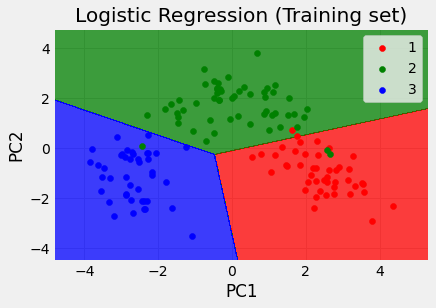

In [77]:
# Paso 4 - Crear una regresión lineal y visualizar el resultados
# Fitting Logistic Regression to the Training set
reg = LogisticRegression(random_state = 0)
reg.fit(X_train, y_train)

# Predicting the Test set results
y_pred = reg.predict(X_test)

# Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Visualising the Training set results
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Training set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


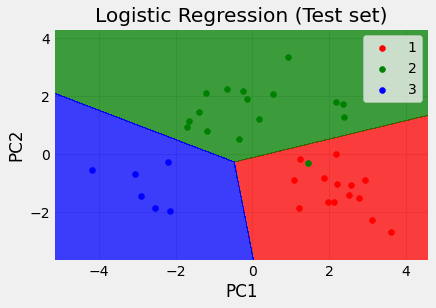

In [79]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, reg.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green', 'blue'))(i), label = j)
plt.title('Logistic Regression (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

### 4. Validación cruzada

In [0]:
# Paso 1 - Importamos librerias
from sklearn.model_selection import cross_val_score  
from sklearn.linear_model import LinearRegression


In [0]:
reg = LinearRegression()
cv_results = cross_val_score(reg, X, y, cv=5)  
print(cv_results)


In [0]:
np.mean(cv_results)


In [0]:
from sklearn.linear_model import Lasso
names = df.drop('target', axis=1).columns  
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_
_ = plt.plot(range(len(names)), lasso_coef)
_ = plt.xticks(range(len(names)), names, rotation=60)
_ = plt.ylabel('Coefficients')  
plt.show()


### 5. Matriz de confusión

In [0]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.neighbors import KNeighborsClassifier 
iris = datasets.load_iris()  


In [0]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.4, random_state=42)   


In [0]:
knn = KNeighborsClassifier(n_neighbors=6) 
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_test)

In [0]:
print(confusion_matrix(y_test, y_pred))

In [0]:
print(classification_report(y_test, y_pred))

### 6. Identificar los mejores parametros

In [0]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'n_neighbors': np.arange(1, 50)} 
knn = KNeighborsClassifier()  
knn_cv = GridSearchCV(knn, param_grid, cv=5) 
knn_cv.fit(X, y) 
knn_cv.best_params_

In [0]:
knn_cv.best_score_

### 7. Normalización de los datos


In [0]:
from sklearn.preprocessing import scale
X  = iris.data

In [0]:
X

In [0]:
X_scaled = scale(X) 

In [0]:
X_scaled

In [0]:
np.mean(X), np.std(X) 

In [0]:
np.mean(X_scaled), np.std(X_scaled)

### 8. Información categorica

In [0]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder
## ML
from sklearn.linear_model import LinearRegression
np.set_printoptions(precision=1,suppress=True)

In [0]:

url = 'https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/fondo_inversion.csv'
dataset = pd.read_csv(url)
dataset.head()


In [0]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 4].values

In [0]:
X

In [0]:
labelencoder = LabelEncoder()
X[:, 3] = labelencoder.fit_transform(X[:, 3])
X

In [0]:
ct =ColumnTransformer([('encoder', OneHotEncoder(), [3])],remainder='passthrough')
X= np.array(ct.fit_transform(X), dtype=np.float)

In [0]:
X

### 9. Información faltante

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer

In [0]:
# Importing the dataset
dataset = pd.read_csv('https://github.com/julian-masdatascience/ML/raw/master/A_Z/DS/Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 3].values

In [0]:
dataset.info()

In [0]:
X

In [0]:
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
imputer=imputer.fit(X[:,1:3])


In [0]:
X[:,1:3]=imputer.transform(X[:,1:3])

In [0]:
X